# __Hands-on with TensorFlow: Part B__

- In this demo, let's see how to implement ensemble techniques using Keras and sklearn.

## Step 1: Import the required libraries and load the dataset

- Import necessary libraries from Sklearn, TensorFlow, and Keras.
- Load the dataset using sklearn's make_moons function.
- Define X and y and split the dataset into training and testing sets using the train_test_split function.

In [1]:
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X,y=make_moons(n_samples=500,noise=0.30,random_state=42)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [2]:
X[:10]

array([[ 0.83103915, -0.25874875],
       [ 1.18506381,  0.92038714],
       [ 1.16402213, -0.45552558],
       [-0.0236556 ,  1.08628844],
       [ 0.48050273,  1.50942444],
       [ 1.31164912, -0.55117606],
       [ 1.16542367, -0.15862989],
       [ 0.1567364 ,  1.31817168],
       [ 0.45330102,  0.49607493],
       [ 1.65139719, -0.45980435]])

In [3]:
y[:10]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

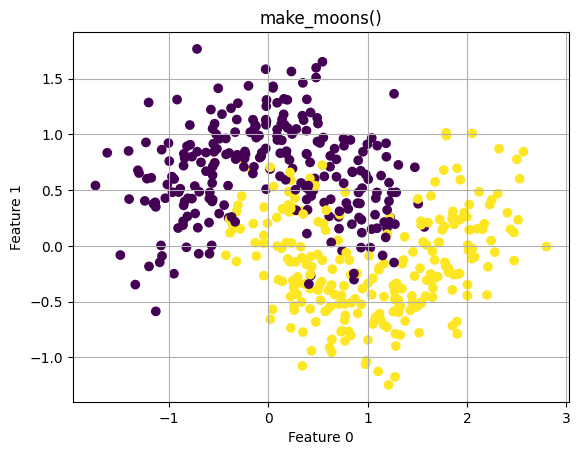

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y)
plt.title('make_moons()')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.grid(True)
plt.show()

__Observation:__
- The necessary libraries and modules have been downloaded.

## Step 2: Define Classifiers

- Define Logistic Regression, Random Forest, Support Vector Machine, and Keras Neural Network classifiers


In [5]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42,probability=True)

- Import Sequential and Dense modules from the TensorFlow library to create a neural network
- Define the function build_nn() to build a neural network


In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_nn():
    model = Sequential([
        Dense(50, activation='relu', input_shape=[2]),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer='Adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

- Now, let's wrap scikit learn and build a neural network with 500 epochs with the Keras Classifier.

In [7]:
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_nn():
    model = Sequential([
        Dense(50, activation='relu', input_shape=[2]),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer='Adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

keras_clf = KerasClassifier(build_fn=build_nn, epochs=500, verbose=False)

__Observation:__
- Scikit learn is wrapped.

In [8]:
keras_clf._estimator_type = "classifier"

## Step 3: Create the Voting Classifier

- Combine the classifiers using sklearn's VotingClassifier with soft voting


In [9]:
voting = VotingClassifier(
             estimators=[('lr', log_clf),
                         ('rf', rnd_clf),
                         ('svc', svm_clf),
                         ('keras',keras_clf)],
             voting='soft',
             flatten_transform=True)

- The classifiers are combined with soft voting.

## Step 4: Train and Evaluate the Classifiers

- Train the voting classifier and each individual classifier
- Make predictions on the test set and calculate the accuracy for each classifier


In [10]:
voting = VotingClassifier(estimators=[('Keras', KerasClassifier(model=build_nn, epochs=500, verbose=False))])

In [11]:
voting.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

- Consider voting with VotingClassifier and estimator
- The first is LogisticRegression, the second is RandomForest, the third is SVM, the fourth is KerasClassifier, and the fifth is VotingClassifier.

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, keras_clf, voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

__Observation:__

- As shown above, LogisticRegression is at 86% accuracy, RandomForest is at 89%, SVM is at 89%, KerasClassifier is at 89%, and VotingClassifier is at 92%.